## Import Libraries

In [1]:
# Import Libraries 
from matplotlib.figure import Figure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read CSV Data

In [2]:
# Read the data 
df=pd.read_csv("titanic-passengers.csv",sep=";")
# Show the head of the csv file
print (df.head(5))
print("-----------------------------------------------------------------------")
# Show sum of empity cells
print ("   Null Sum   ")
print("------------------")
print (df.isnull().sum())


   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
-----------------------------------------------------------------------
   Null Sum   
------------------

## Data preprocessing

In [3]:

# Data Peprocessing 
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df['Cabin']=df.Cabin.fillna('G6')
df.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
# Show the sum of empity cells after the preprocessing 
print (df.isnull().sum())
print (len(df))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64
891


## Data Visualization

### Data Distriution for some features 

<AxesSubplot:title={'center':'Age Distribution '}, xlabel='Ages', ylabel='Frequency'>

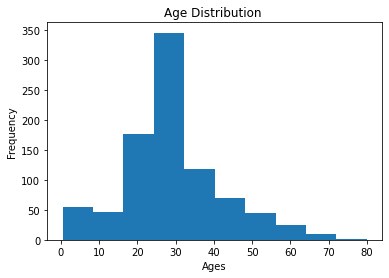

In [4]:
plt.title("Age Distribution ")
plt.xlabel("Ages")
df["Age"].plot.hist()

<AxesSubplot:title={'center':'Data Distriution for sex'}>

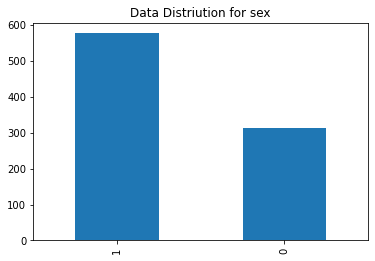

In [5]:
plt.title("Data Distriution for sex")
pt=df["Sex"].value_counts()
pt.plot.bar()

<AxesSubplot:title={'center':'Distriution Data for Survived Individuals'}>

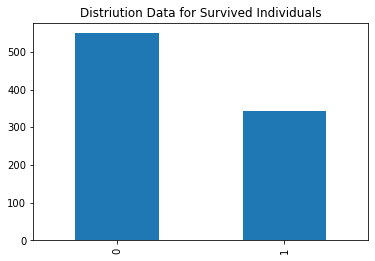

In [6]:
plt.title("Distriution Data for Survived Individuals")
pt=df["Survived"].value_counts()
pt.plot.bar()

### Impact of Age and Six Features on Survival of individuals

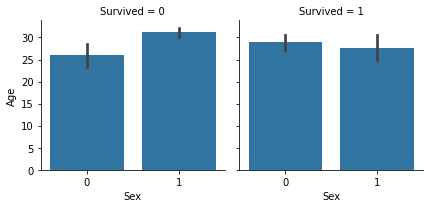

In [18]:
grid = sns.FacetGrid(df, col="Survived")
grid.map(sns.barplot,"Sex","Age")
grid.add_legend()

### Impact of Passenger ID and  Embarked Features on Survival of individuals 

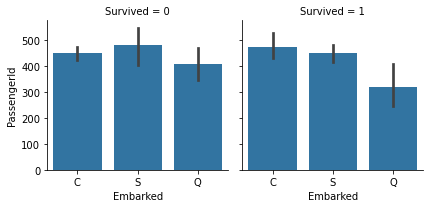

In [8]:
grid = sns.FacetGrid(df, col="Survived")
grid.map(sns.barplot,"Embarked","PassengerId")
grid.add_legend()

### Corrolation Map Function

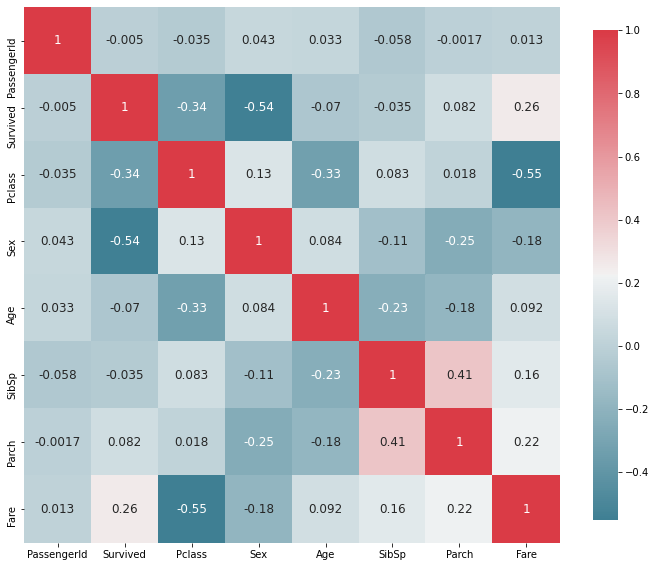

In [9]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    
plot_correlation_map( df )
plt.show()      

#### Discribtion of the above function 



The Previous function creats a correlation heat map to study the corrolation between features that can affect on servival of individuals , and After that creating heatmap that can present these correlation . We can Specify the shape of the heat map useing some parameters like font size , shrink , ........ etc 


### Relation  between Pclass and survived using groupby function with mean 

In [10]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)
df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Extract Titles From Names and add Theme to The Dataframe

In [11]:
Title=[]
for  i in range(0,len(df)):
    x=((df["Name"][i].split(", "))[1]).split(".")[0]
    Title.append(x)
print () 
df ["Title"]=Title 
print (df["Title"])




0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object


### Titles Distribution Features 

<AxesSubplot:>

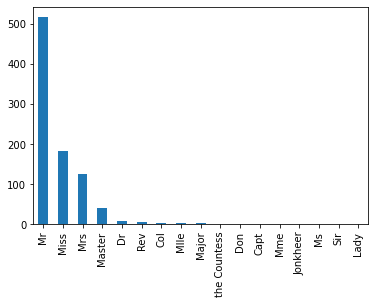

In [12]:
c=df["Title"].value_counts()
c.plot.bar()

### Corrolation Between Title Feature and Some Other Features

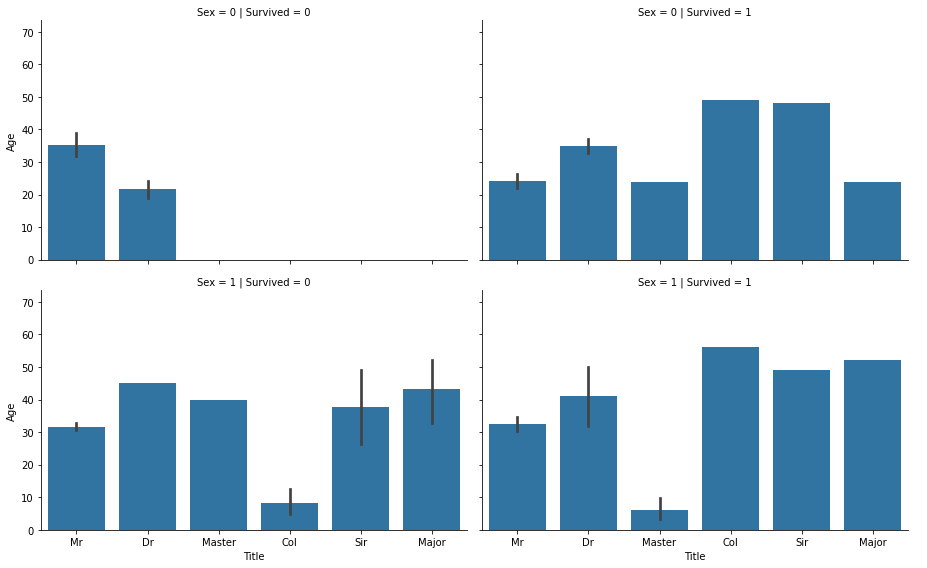

In [13]:
grid = sns.FacetGrid(df, col="Survived",row="Sex", height=4, aspect=1.6)
grid.map(sns.barplot,"Title","Age")
grid.add_legend()

### Use  More Useful Titles 

In [14]:

Title_Dictionary = {

                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                  "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mrs",
                    "Master":"Master"
                    }
Title2=[]
for  i in range(0,len(df)):
    x=df["Title"][i]
    Title2.append(Title_Dictionary[x]) 
   
df["Title2"]=Title2
print(df["Title2"])

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title2, Length: 891, dtype: object


### Distribution of Title Feature After Editing   

<AxesSubplot:>

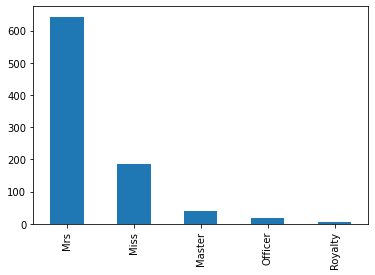

In [15]:
c=df["Title2"].value_counts()
c.plot.bar()

### Corrolation Between Title2 Feature and Some Other Features

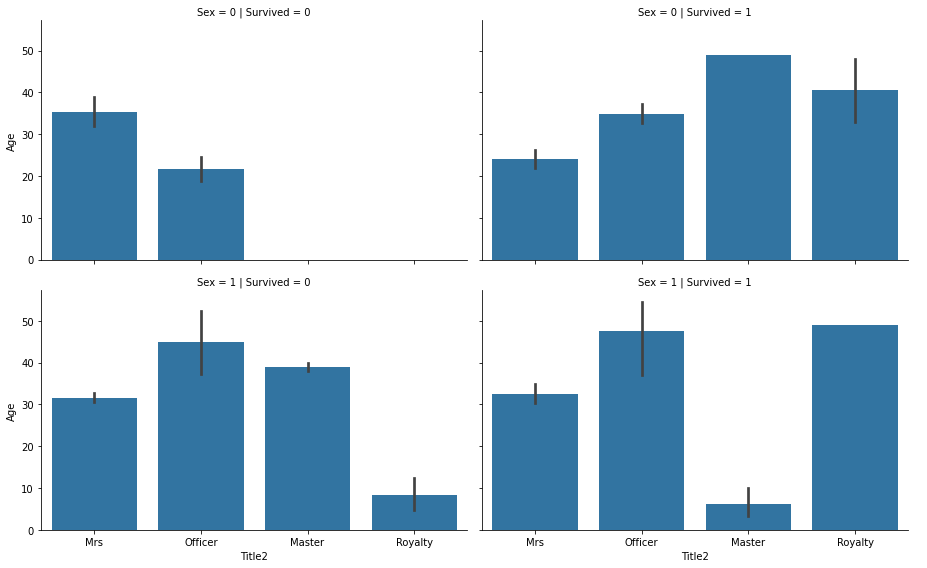

In [16]:
grid = sns.FacetGrid(df, col="Survived",row="Sex", height=4, aspect=1.6)
grid.map(sns.barplot,"Title2","Age")
grid.add_legend()

###                      Using SibSp and Parch Feature to Create FamilySize Feature  
#### Sibsp represents the number of siblings/spouses aboard &  Parch represents the number of Parents/Children Aboard


In [17]:
List =[]
for i in range (0,len(df)):
    x = df["Parch"][i]+df["SibSp"][i]
    List.append(x)
df["FamilySize"]=List
print (df["FamilySize"])    

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64
